## 예제
1. drinks.csv 파일 로드
2. 결측치를 확인
3. 데이터프레임의 정보 출력
4. continent 컬럼에서 결측치 존재 -> 결측치 'OT'로 대체
5. continent 별 spirit_servings 컬럼의 평균, 최소, 최대, 합계를 출력
6. total_litress_of_pure_alcohol 컬럼의 평균보다 높은 continent가 어디인지 출력
7. 국가별 술 소비량 대비 알콜 비율 컬럼을 추가

In [31]:
import pandas as pd

In [32]:
drinks = pd.read_csv("../csv/csv/drinks.csv")
drinks.head(5)

,country,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol,continent
0,Afghanistan,0,0,0,0.0,AS
1,Albania,89,132,54,4.9,EU
2,Algeria,25,0,14,0.7,AF
3,Andorra,245,138,312,12.4,EU
4,Angola,217,57,45,5.9,AF


In [33]:
drinks.isna().sum()

country                          0
beer_servings                    0
spirit_servings                  0
wine_servings                    0
total_litres_of_pure_alcohol     0
continent                       23
dtype: int64

In [34]:
drinks['continent'].isna()

0      False
1      False
2      False
3      False
4      False
       ...  
188    False
189    False
190    False
191    False
192    False
Name: continent, Length: 193, dtype: bool

In [35]:
drinks.loc[(drinks['continent'].isna()),'continent']

5      NaN
11     NaN
14     NaN
17     NaN
32     NaN
41     NaN
43     NaN
50     NaN
51     NaN
54     NaN
68     NaN
69     NaN
73     NaN
74     NaN
84     NaN
109    NaN
122    NaN
130    NaN
143    NaN
144    NaN
145    NaN
174    NaN
184    NaN
Name: continent, dtype: object

In [36]:
drinks.describe()

,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol
count,193.000000,193.000000,193.000000,193.000000
mean,106.160622,80.994819,49.450777,4.717098
std,101.143103,88.284312,79.697598,3.773298
min,0.000000,0.000000,0.000000,0.000000
25%,20.000000,4.000000,1.000000,1.300000
50%,76.000000,56.000000,8.000000,4.200000
75%,188.000000,128.000000,59.000000,7.200000
max,376.000000,438.000000,370.000000,14.400000


In [37]:
drinks['continent'].fillna("OT", inplace=True)

In [38]:
drinks.isna().sum()

country                         0
beer_servings                   0
spirit_servings                 0
wine_servings                   0
total_litres_of_pure_alcohol    0
continent                       0
dtype: int64

In [39]:
group_data = drinks[["continent", "spirit_servings"]].groupby("continent").agg(['mean','min','max','sum'])
group_data

spirit_servings               
                     mean min  max   sum
continent                               
AF              16.339623   0  152   866
AS              60.840909   0  326  2677
EU             132.555556   0  373  5965
OC              58.437500   0  254   935
OT             165.739130  68  438  3812
SA             114.750000  25  302  1377

In [40]:
group_data.columns

MultiIndex([('spirit_servings', 'mean'),
            ('spirit_servings',  'min'),
            ('spirit_servings',  'max'),
            ('spirit_servings',  'sum')],
           )

In [41]:
import matplotlib.pyplot as plt

<BarContainer object of 6 artists>

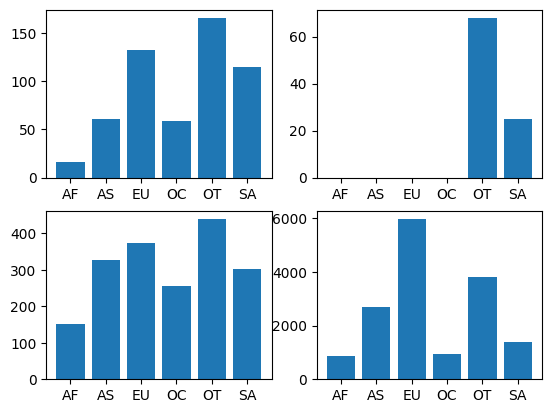

In [42]:
# 바형 그래프
# 한 화면에 4개의 그래프
x = group_data.index

#subplot(행의 수, 열의 수, 영역지정)
plt.subplot(2,2,1)
plt.bar(x, group_data['spirit_servings']['mean'])
plt.subplot(2,2,2)
plt.bar(x, group_data['spirit_servings']['min'])
plt.subplot(2,2,3)
plt.bar(x, group_data['spirit_servings']['max'])
plt.subplot(2,2,4)
plt.bar(x, group_data['spirit_servings']['sum'])


In [43]:
pd.pivot_table(
    drinks,
    index = 'continent',
    aggfunc= ['mean','min','max','sum'],
    values = 'spirit_servings',
)

,mean,min,max,sum
,spirit_servings,spirit_servings,spirit_servings,spirit_servings
continent,,,,
AF,16.339623,0,152,866
AS,60.840909,0,326,2677
EU,132.555556,0,373,5965
OC,58.437500,0,254,935
OT,165.739130,68,438,3812
SA,114.750000,25,302,1377


In [44]:
total_mean = drinks['total_litres_of_pure_alcohol'].mean()
total_mean

4.717098445595855

In [47]:
alco = drinks[["continent", "total_litres_of_pure_alcohol"]].groupby("continent")\
.mean()

alco_s = alco['total_litres_of_pure_alcohol'] #스리즈로 만들기
alco_s

continent
AF    3.007547
AS    2.170455
EU    8.617778
OC    3.381250
OT    5.995652
SA    6.308333
Name: total_litres_of_pure_alcohol, dtype: float64

In [48]:
alco_s[alco_s > total_mean]

continent
EU    8.617778
OT    5.995652
SA    6.308333
Name: total_litres_of_pure_alcohol, dtype: float64

In [49]:
alco_asd = alco.sort_values("total_litres_of_pure_alcohol", ascending=False)
alco_asd.loc[alco_asd['total_litres_of_pure_alcohol'] > total_mean].index

Index(['EU', 'SA', 'OT'], dtype='object', name='continent')

In [50]:
drinks['drink_sum'] = drinks["beer_servings"] + drinks["spirit_servings"] + drinks["wine_servings"]
drinks.head(5)

,country,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol,continent,drink_sum
0,Afghanistan,0,0,0,0.0,AS,0
1,Albania,89,132,54,4.9,EU,275
2,Algeria,25,0,14,0.7,AF,39
3,Andorra,245,138,312,12.4,EU,695
4,Angola,217,57,45,5.9,AF,319


In [51]:
drinks['country_alco'] = (drinks['total_litres_of_pure_alcohol'] / drinks['drink_sum']) * 100

In [52]:
drinks.head(5)

,country,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol,continent,drink_sum,country_alco
0,Afghanistan,0,0,0,0.0,AS,0,NaN
1,Albania,89,132,54,4.9,EU,275,1.781818
2,Algeria,25,0,14,0.7,AF,39,1.794872
3,Andorra,245,138,312,12.4,EU,695,1.784173
4,Angola,217,57,45,5.9,AF,319,1.849530


In [53]:
drinks['country_alco'].fillna(0)

0      0.000000
1      1.781818
2      1.794872
3      1.784173
4      1.849530
         ...   
188    1.766055
189    1.754386
190    1.666667
191    4.545455
192    5.465116
Name: country_alco, Length: 193, dtype: float64

In [54]:
drinks_al = drinks.sort_values('country_alco', ascending=False)
drinks_al

,country,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol,continent,drink_sum,country_alco
63,Gambia,8,0,1,2.4,AF,9,26.666667
153,Sierra Leone,25,3,2,6.7,AF,30,22.333333
124,Nigeria,42,5,2,9.1,AF,49,18.571429
179,Uganda,45,9,0,8.3,AF,54,15.370370
142,Rwanda,43,2,0,6.8,AF,45,15.111111
...,...,...,...,...,...,...,...,...
107,Mauritania,0,0,0,0.0,AF,0,NaN
111,Monaco,0,0,0,0.0,EU,0,NaN
128,Pakistan,0,0,0,0.0,AS,0,NaN
147,San Marino,0,0,0,0.0,EU,0,NaN


In [58]:
drinks_al.reset_index(drop=True, inplace = True)
drinks_al.head(20)

,country,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol,continent,drink_sum,country_alco
0,Gambia,8,0,1,2.4,AF,9,26.666667
1,Sierra Leone,25,3,2,6.7,AF,30,22.333333
2,Nigeria,42,5,2,9.1,AF,49,18.571429
3,Uganda,45,9,0,8.3,AF,54,15.370370
4,Rwanda,43,2,0,6.8,AF,45,15.111111
5,Tanzania,36,6,1,5.7,AF,43,13.255814
6,Burkina Faso,25,7,7,4.3,AF,39,11.025641
7,Central African Republic,17,2,1,1.8,AF,20,9.000000
8,Cote d'Ivoire,37,1,7,4.0,AF,45,8.888889
9,Mali,5,1,1,0.6,AF,7,8.571429


In [56]:
drinks_al.loc[drinks_al['country'] == 'South Korea']

,country,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol,continent,drink_sum,country_alco
14,South Korea,140,16,9,9.8,AS,165,5.939394


In [57]:
drinks_al.loc[drinks_al['country'] == 'North Korea']

,country,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol,continent,drink_sum,country_alco
182,North Korea,0,0,0,0.0,AS,0,NaN


In [69]:
drinks_al.loc[drinks_al['country'] == 'South Korea', 'country_alco'].values[0]

5.93939393939394

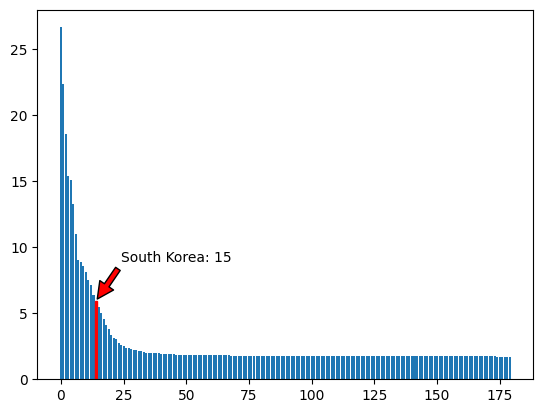

In [72]:
# 시각화
# 우리나라를 그래프에서 표기

x = list(range(len(drinks_al)))
y = drinks_al['country_alco']

# 국가 리스트
country_list = drinks_al['country'].tolist()

bar_list = plt.bar(x,y)
#plt.show()
korea_rank = country_list.index("South Korea")
korea_alcohol_rate = drinks_al.loc[drinks_al['country'] == 'South Korea', 'country_alco'].values[0]
# 그래프 커스텀

# South Korea 막대 색상 변경
bar_list[korea_rank].set_color('r') #빨간색

#그래프에 글씨와 화살표 추가
plt.annotate('South Korea: ' + str(korea_rank +1), xy = (korea_rank, korea_alcohol_rate),\
    xytext = (korea_rank + 10 , korea_alcohol_rate+3),\
    arrowprops = dict(facecolor = 'r', shrink = 0.05)
        ) #xy는 위치, arrowprops는 화살표, xytext는 텍스트 시작위치


plt.show()